# Домашнее задание по теме «Работа с переменными» обновленное

**Задание**

Цель: изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.

**Описание задания:**

В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

# 1. Получите данные и загрузите их в рабочую среду.

In [40]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [41]:
housing = fetch_california_housing()
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [42]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# 2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.

In [43]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

# 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [44]:
X = df.iloc[:, :-1]
y = df['MedHouseVal']

In [45]:
model = LinearRegression()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [47]:
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error
import math

In [50]:
#метрики RMSE
RMSE_train_1 = math.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_test_1 = math.sqrt(mean_squared_error(y_test, y_pred_test))
print(RMSE_train_1)
print(RMSE_test_1)

0.7196757085831575
0.7455813830127764


In [51]:
#метрики R2
R2_train_1 = model.score(X_train, y_train)
R2_test_1 = model.score(X_test, y_test)
print(R2_train_1)
print(R2_test_1)

0.6125511913966952
0.5757877060324508


# 5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

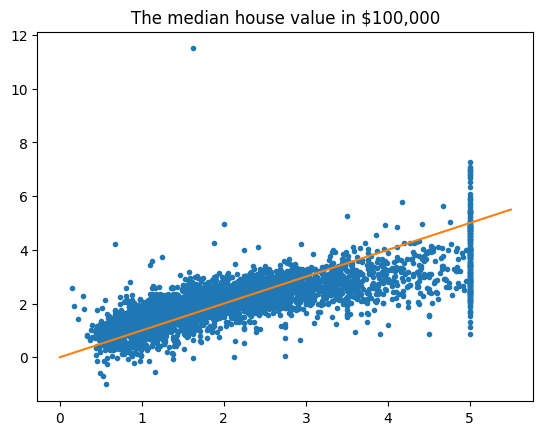

In [52]:
plt.plot(y_test, y_pred_test, '.')
x = np.linspace(0, 5.5)
y = x
plt.plot(x, y)
plt.title('The median house value in $100,000')
plt.show()

Text(0.5, 1.0, 'The median house value in $100,000')

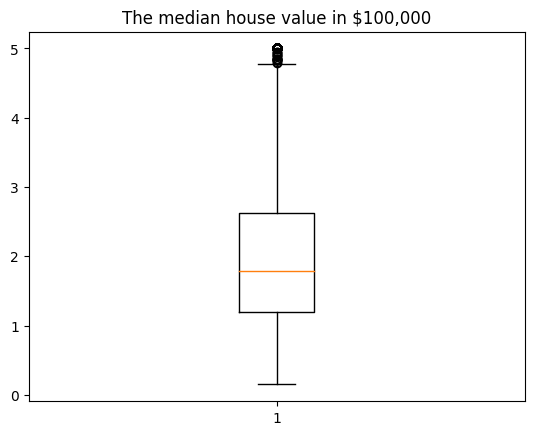

In [53]:
plt.boxplot(y_test)
plt.title('The median house value in $100,000')

**ВЫВОД:** по графику boxplot видно, что МКР цен распределен примерно в диапазоне от $120,000 до $260,000, выбросы появляются примерно с $470,000.

# 6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
a. Сделайте выводы.

b. Удалите признаки на основании полученных значений, выводов.

c. Повторите п. 3, п. 4 на измененных данных.

In [54]:
y = pd.DataFrame(housing.target, columns=housing.target_names)

<Axes: >

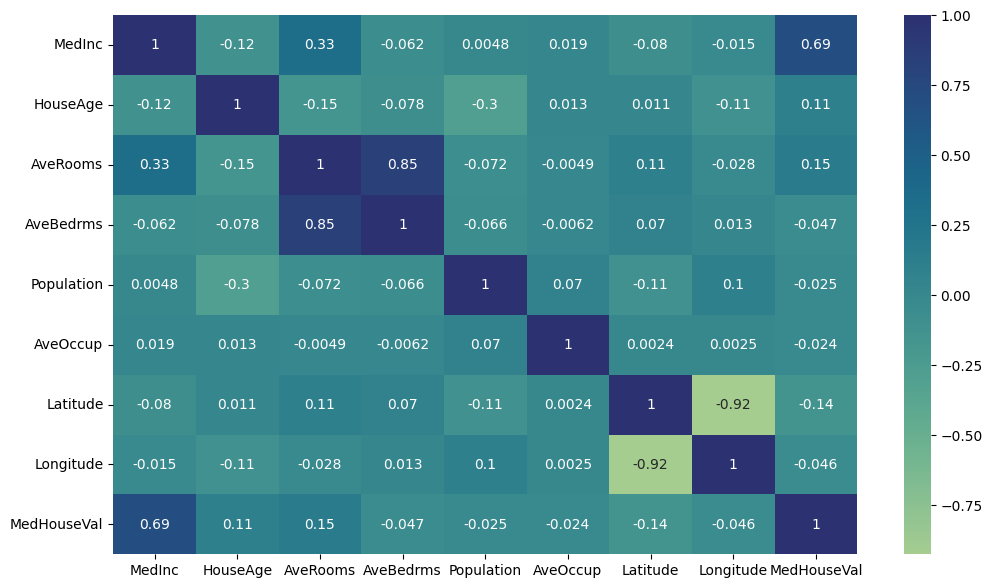

In [55]:
plt.figure(figsize=(12,7))
sb.heatmap(pd.concat([X, y], axis=1).corr(), cmap='crest',annot=True)

In [56]:
#удаляем признаки, у которых корреляция с целевой переменной менее |0.1|
X2 = X.iloc[:, [0, 1, 2, 6]]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X2,y, test_size = 0.2, random_state = 42)

In [58]:
model = LinearRegression()

In [59]:
model.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [61]:
#метрики RMSE
RMSE_train_2 = math.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_test_2 = math.sqrt(mean_squared_error(y_test, y_pred_test))
print(RMSE_train_2)
print(RMSE_test_2)

0.7989089953528047
0.8059451277212133


In [62]:
#метрики R2
R2_train_2 = model.score(X_train, y_train)
R2_test_2 = model.score(X_test, y_test)
print(R2_train_2)
print(R2_test_2)

0.5225419016956813
0.5043169272470043


# 7. Исследуйте оставленные признаки на выбросы.
a. Удалите выбросы в случае обнаружения.

b. Повторите п. 3, п. 4 на измененных данных.

In [63]:
X2.describe()

,MedInc,HouseAge,AveRooms,Latitude
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,35.631861
std,1.899822,12.585558,2.474173,2.135952
min,0.499900,1.000000,0.846154,32.540000
25%,2.563400,18.000000,4.440716,33.930000
50%,3.534800,29.000000,5.229129,34.260000
75%,4.743250,37.000000,6.052381,37.710000
max,15.000100,52.000000,141.909091,41.950000


Text(0.5, 1.0, 'The distribution of MedInc')

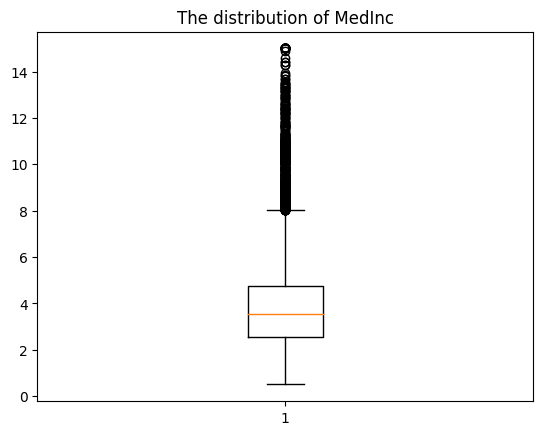

In [64]:
plt.boxplot(X2.MedInc)
plt.title('The distribution of MedInc')

Text(0.5, 1.0, 'The distribution of HouseAge')

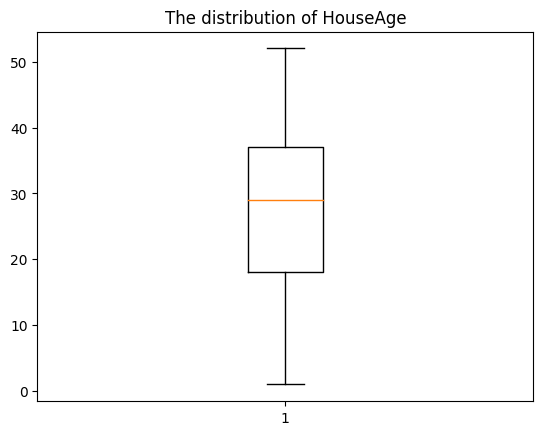

In [65]:
plt.boxplot(X2.HouseAge)
plt.title('The distribution of HouseAge')

Text(0.5, 1.0, 'The distribution of AveRooms')

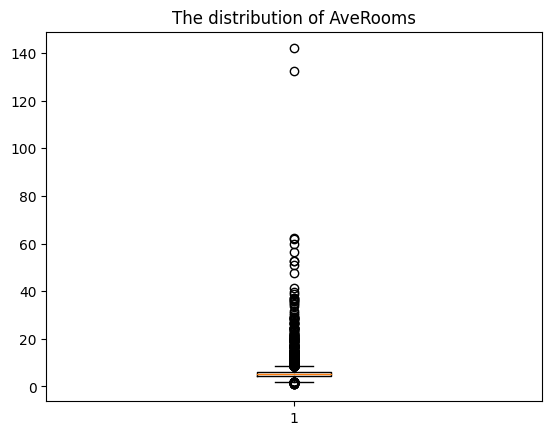

In [66]:
plt.boxplot(X2.AveRooms)
plt.title('The distribution of AveRooms')

Text(0.5, 1.0, 'The distribution of Latitude')

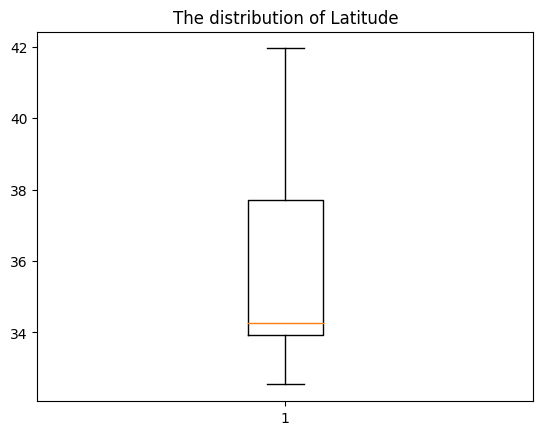

In [67]:
plt.boxplot(X2.Latitude)
plt.title('The distribution of Latitude')

In [68]:
#для удаления выбросов используем Z-оценку
import scipy.stats as st

In [69]:
X2['MedHouseVal'] = housing.target

<ipython-input-69-1e80bc6f225a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['MedHouseVal'] = housing.target


In [70]:
z = np.abs(st.zscore(X2))

In [71]:
X2_clean = X2[(z<3).all(axis=1)]

Text(0.5, 1.0, 'The distribution of MedInc')

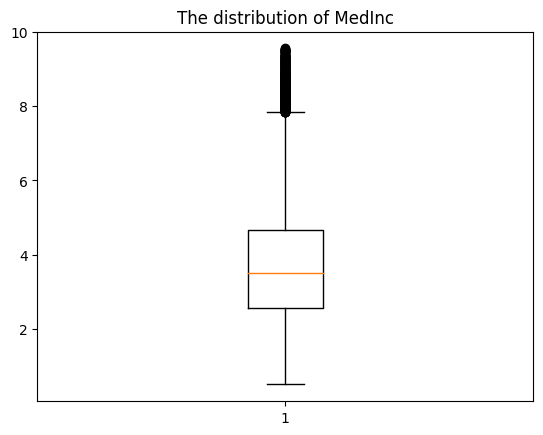

In [72]:
plt.boxplot(X2_clean.MedInc)
plt.title('The distribution of MedInc')

Text(0.5, 1.0, 'The distribution of AveRooms')

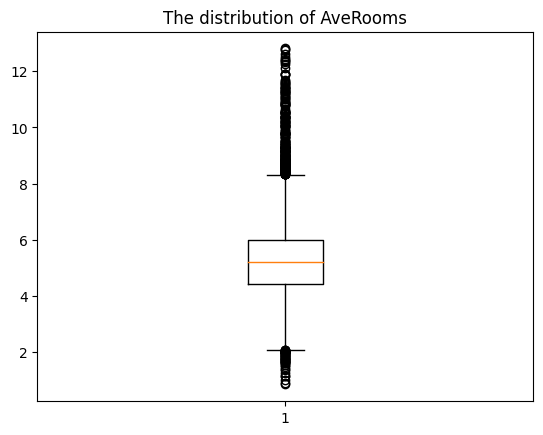

In [73]:
plt.boxplot(X2_clean.AveRooms)
plt.title('The distribution of AveRooms')

Text(0.5, 1.0, 'The distribution of Latitude')

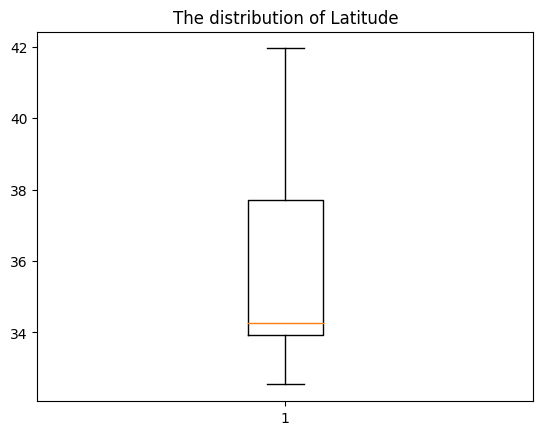

In [74]:
plt.boxplot(X2.Latitude)
plt.title('The distribution of Latitude')

In [75]:
y = X2_clean['MedHouseVal']
X2_clean = X2_clean.iloc[:, :-1]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X2_clean,y, test_size = 0.2, random_state = 42)

In [77]:
model = LinearRegression()

In [78]:
model.fit(X_train, y_train)

LinearRegression()

In [79]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [80]:
#метрики RMSE
RMSE_train_3 = math.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_test_3 = math.sqrt(mean_squared_error(y_test, y_pred_test))
print(RMSE_train_3)
print(RMSE_test_3)

0.7686432287469273
0.7944194262660033


In [81]:
#метрики R2
R2_train_3 = model.score(X_train, y_train)
R2_test_3 = model.score(X_test, y_test)
print(R2_train_3)
print(R2_test_3)

0.5098093158093364
0.5072674181442818


# 8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
a. Повторите п. 3, п. 4 на измененных данных.

In [83]:
#логарифмируем признак HouseAge
X2_clean['HouseAge'] = np.log1p(X2_clean['HouseAge'])
X2_clean.head(5)

,MedInc,HouseAge,AveRooms,Latitude
0,8.3252,3.737670,6.984127,37.88
1,8.3014,3.091042,6.238137,37.86
2,7.2574,3.970292,8.288136,37.85
3,5.6431,3.970292,5.817352,37.85
4,3.8462,3.970292,6.281853,37.85


In [84]:
#извлечем квадратный корень из признака Latitude
X2_clean['Latitude'] = np.sqrt(X2_clean['Latitude'])
X2_clean.head(5)

,MedInc,HouseAge,AveRooms,Latitude
0,8.3252,3.737670,6.984127,6.154673
1,8.3014,3.091042,6.238137,6.153048
2,7.2574,3.970292,8.288136,6.152235
3,5.6431,3.970292,5.817352,6.152235
4,3.8462,3.970292,6.281853,6.152235


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X2_clean,y, test_size = 0.2, random_state = 42)

In [86]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [87]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [88]:
#метрики RMSE
RMSE_train_4 = math.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_test_4 = math.sqrt(mean_squared_error(y_test, y_pred_test))
print(RMSE_train_4)
print(RMSE_test_4)

0.773606232544385
0.8002978850837622


In [89]:
#метрики R2
R2_train_4 = model.score(X_train, y_train)
R2_test_4 = model.score(X_test, y_test)
print(R2_train_4)
print(R2_test_4)

0.5034587170118043
0.49994829998512746


# 9. Сформулируйте выводы по проделанной работе.
a. Кратко опишите какие преобразования были сделаны с данными.

b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.

c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

In [91]:
compare = pd.DataFrame({'name': ['Model 1', 'Model 2', 'Model 3', 'Model 4'],
                        'RMSE_train': [RMSE_train_1, RMSE_train_2, RMSE_train_3, RMSE_train_4],
                        'RMSE_test': [RMSE_test_1, RMSE_test_2, RMSE_test_3, RMSE_test_4],
                        'R2_train': [R2_train_1, R2_train_2, R2_train_3, R2_train_4],
                        'R2_test': [R2_test_1, R2_test_2, R2_test_3, R2_test_4],
                        'MedInc': [1, 1, 1, 0],
                        'HouseAge': [1, 1, 1, 1],
                        'AveRooms': [1, 1, 1, 0],
                        'AveBedrms': [1, 0, 0, 0],
                        'Population': [1, 0, 0, 0],
                        'AveOccup': [1, 0, 0, 0],
                        'Latitude': [1, 1, 1, 1],
                        'Longitude': [1, 0, 0, 0],
                        'removal_of_outliers': [0, 0, 1, 0],
                        'math_action': [0, 0, 0, 1]})
compare

,name,RMSE_train,RMSE_test,R2_train,R2_test,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,removal_of_outliers,math_action
0,Model 1,0.719676,0.745581,0.612551,0.575788,1,1,1,1,1,1,1,1,0,0
1,Model 2,0.798909,0.805945,0.522542,0.504317,1,1,1,0,0,0,1,0,0,0
2,Model 3,0.768643,0.794419,0.509809,0.507267,1,1,1,0,0,0,1,0,1,0
3,Model 4,0.773606,0.800298,0.503459,0.499948,0,1,0,0,0,0,1,0,0,1


ВЫВОД:
- значение метрики RMSE у моделей с ограничением признаков (Model 2), удалением выбросов (Model 3) и математическими преобразованиями признаков (Model 4) выше, чем у модели без преобразований (Model 1);
- значение метрики R2 у модели без преобразований (Model 1) выше, чем у других моделей;
- таким образом получается, что Model 1 лучше подходит нам для изучения данных, другие модели хуже справляются со своей задачей.